<a href="https://colab.research.google.com/github/rizkinahayyuni/PCVK_Genap_2022/blob/main/Modul7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM FILTER**


**Fungsi Konvolusi**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import math
from PIL import Image as im

**Konvolusi tanpa Library**

**Membuat fungsi konvolusi**

Fungsi konvolusi yang dibuat memiliki parameter berupa :

1. Citra masukan,

2. Kernel berupa matriks untuk memfilter citra,

3. Nilai stride / besarnya pergeseran untuk setiap konvolusi,

4. Nilai pad yang akan ditambahkan pada citra

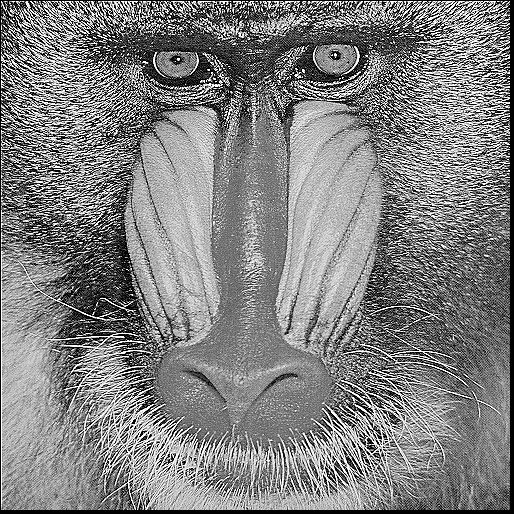

In [4]:
# Fungsi untuk melakukan fungsi konvolusi secara manual
def convolution2D(image, kernel, padding, strides):
    # menjadikan korelasi silang dengan membalik matrik secara horizontal lalu vertical
    kernel = np.flipud(np.fliplr(kernel))

    # Mencari ukuran dari Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Menetapkan ukuran hasil konvolution berdasarkan hasil pencarian ukuran
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Menetapkan padding pada setiap sisi
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        # print(imagePadded)
    else:
        imagePadded = image

    # Perulangan untuk melakukan fungsi konvolusi
    for y in range(image.shape[1]):
        # pengkondisian jika memang telah sampai pada pada akhir batas y, dan akan keluar dari perulangan
        if y > image.shape[1] - yKernShape:
            break
        # pengkondisian untuk memastikan  ukuran langkah setara dengan jumlah langkah yang ditentukan
        if y % strides == 0:
            for x in range(image.shape[0]):
                # pengkondisian jika memang telah sampai akhir batas x, dan akan keluar dari perulangan
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Melakukan rumus fungsi konvolusi jika x sudah dipindahkan oleh stride
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

# membaca gambar
img = cv.imread('/content/drive/MyDrive/DATA/mandrill.tiff')
# mengubah gambar menjadi GRAY
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

# menentukan kernel yang digunakan
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# memanggil fungsi konvolusi yang telah dibuat dan memberikan berbagai atribut yang diperlukan
output = convolution2D(img_gray, kernel, 2, 1)
# Menampilkan hasil
cv2_imshow(output)

**Averange Filter**

**Low Pass Filter**

**High Pass Filter**

**Sharpen**

**Emboss**

**Canny Edge Detection**

**21x21 Gaussian Blur**

# **Sumber Bahan Ajar**


1. https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
2. 